Above all, we need graphviz package. You can also refer to graphviz [documentation](https://graphviz.readthedocs.io/en/stable/manual.html)

```bash
pip install -U graphviz
```

In [1]:
import torch
from torch import nn

In [2]:
from yolort.models import yolov5s
from yolort.relaying import get_trace_module

In [3]:
model = yolov5s(pretrained=True)
tracing_module = get_trace_module(model)

/opt/homebrew/lib/python3.9/site-packages/pytorch_lightning/core/lightning.py:168: LightningDeprecationWarning: The `LightningModule.datamodule` property is deprecated in v1.3 and will be removed in v1.5. Access the datamodule through using `self.trainer.datamodule` instead.
  rank_zero_deprecation(
/Users/zhiqiang/Coding/yolov5-rt-stack/yolort/models/yolo_module.py:97: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  for img in inputs:
/Users/zhiqiang/Coding/yolov5-rt-stack/yolort/models/transform.py:79: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  images = [img for img in images]
/opt/homebrew/lib/python3.9/site-packages/torch/nn/fu

In [4]:
print(tracing_module.code)

def forward(self,
    x: Tensor) -> Tuple[Tensor, Tensor, Tensor]:
  _0, _1, _2, = (self.model).forward(x, )
  return (_0, _1, _2)



In [5]:
from yolort.relaying.ir_visualizer import TorchScriptVisualizer

In [6]:
visualizer = TorchScriptVisualizer(tracing_module.model)

In [7]:
dot1 = visualizer.render(classes_to_visit={'YOLO', 'YOLOHead'})

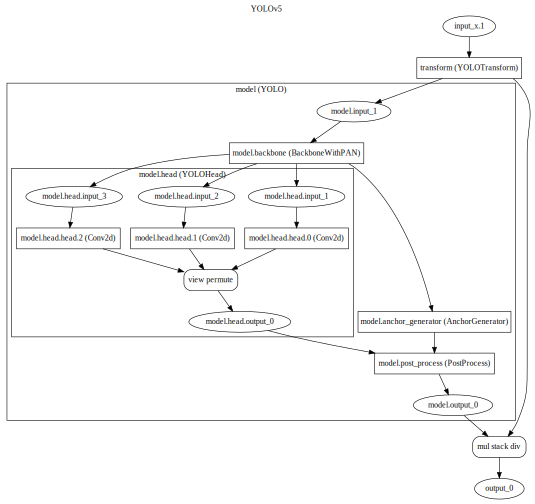

In [8]:
dot1

In [9]:
dot2 = visualizer.render(classes_to_visit={'YOLO', 'PostProcess'})

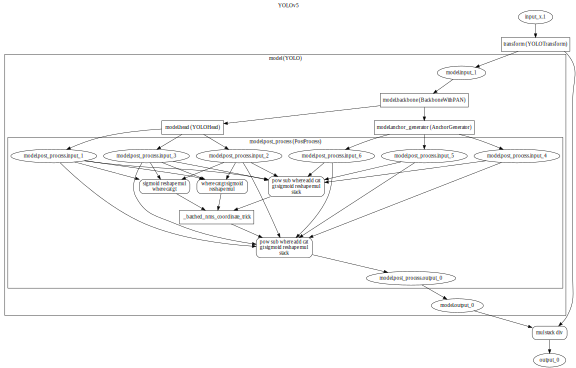

In [10]:
dot2